In [202]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
#from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [203]:
# mount google drive
# drive.mount('/content/gdrive')

In [204]:
# load the data
# data = pd.read_csv('gdrive/My Drive/MSAAI-500 Group 3/data.csv')
# data = pd.read_csv('gdrive/My Drive/MSAAI- 500 Statistics/MSAAI-500 Group 3/data.csv')
# data.head()

In [205]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [206]:
# list the data types for each column
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [207]:
### Data Cleaning / Preparation
# date should be a date and not a string object
data["date"] = pd.to_datetime(data["date"])

# change price and bedrooms to integers
data["price"] = (data["price"]/1000).astype(int) # Convert Price to Be in Thousands of Dollars
data["bedrooms"] = data["bedrooms"].astype(int)

# add boolean columns for having a basement and being renovated
data["basement"] = data["sqft_basement"].apply(lambda x: 1 if x > 0 else 0).astype(int)
data["renovated"] = data["yr_renovated"].apply(lambda x: 1 if x > 0 else 0).astype(int)

# pull out the zip code and store it as an integer
data["zipcode"] = data["statezip"].str[-5:]
data["zipcode"] = data["zipcode"].astype(int)

# add a label encoder for the city
le = LabelEncoder()
data["city_code"] = le.fit_transform(data["city"])

# print new dataset
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,basement,renovated,zipcode,city_code
0,2014-05-02,313,3,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,1,98133,36
1,2014-05-02,2384,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1,0,98119,35
2,2014-05-02,342,3,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,0,98042,18
3,2014-05-02,420,3,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1,0,98008,3
4,2014-05-02,550,4,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1,1,98052,31


In [208]:
# confirm the new data types
data.dtypes

date             datetime64[ns]
price                     int32
bedrooms                  int32
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
basement                  int32
renovated                 int32
zipcode                   int32
city_code                 int32
dtype: object

In [209]:
# describe the data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,basement,renovated,zipcode,city_code
count,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,551.815870,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,0.403261,0.405435,98079.379783,25.674348
std,563.854188,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.490606,0.491029,53.142102,11.982721
min,0.000000,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,98001.000000,0.000000
25%,322.750000,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.000000,0.000000,98033.000000,17.000000
50%,460.500000,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.000000,0.000000,98072.000000,32.000000
75%,654.250000,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,1.000000,1.000000,98117.000000,35.000000
max,26590.000000,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.000000,1.000000,98354.000000,43.000000


In [210]:
## Begin EDA Analysis ##
# Split the Data Between Categorical (Qualitative) and Quantitative
# Date Was Not Used as the Data Was Collected Over a 3 Month Period and Not a Year, It Would Not Be Relivent to the Hypothesis We're Testing
# Parameters Are Stored in a Dictionary Key: Parameter Name, Value: Title of the X-Axis for Auto Graph Population
categorical_data = {'yr_built':'Year Built', 'yr_renovated':'Year Renovated', 'renovated': 'Renovated (Yes or No)', 'condition': 'Condition of Home (1 - 5)', 'zipcode': 'Zipcode of Home', 'basement':'Basement (Yes or No)',
                    'waterfront': 'Located on Waterfront (Yes or No)', 'view': 'Ranking of View from Home (0 - 4)', 'city_code': 'City Code'}
quantitative_data = {'price':'Price in USD (Per Thousand)', 'bedrooms':'Number Bedrooms', 'bathrooms':'Number of Bathrooms', 'sqft_living':'Square Feet of Living Space', 'sqft_lot':'Square Feet of the Lot', 'floors':'Number of Floors',
                     'sqft_above':'Square Feet Above Any Existing Basement', 'sqft_basement':'Square Feet of the Basement'}

Categorical Data:



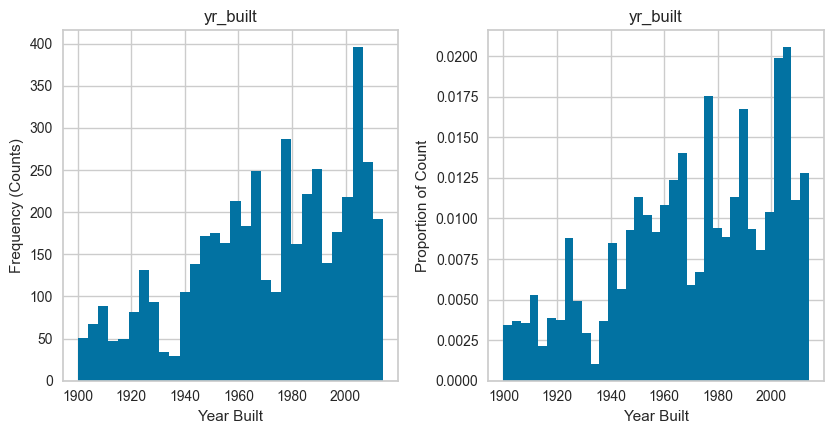

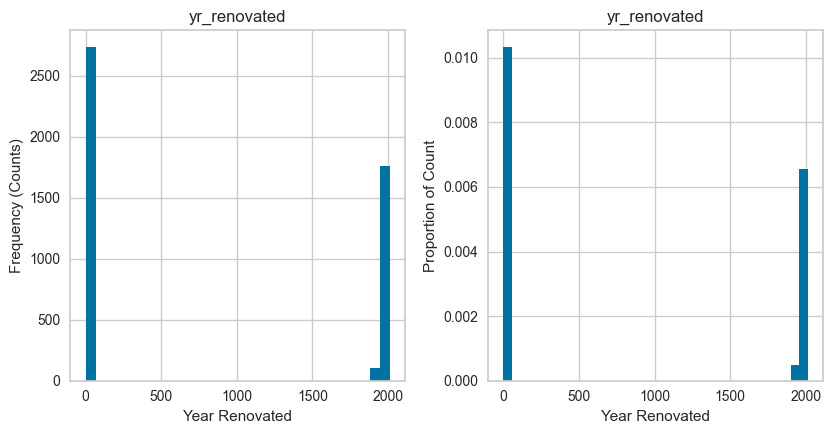

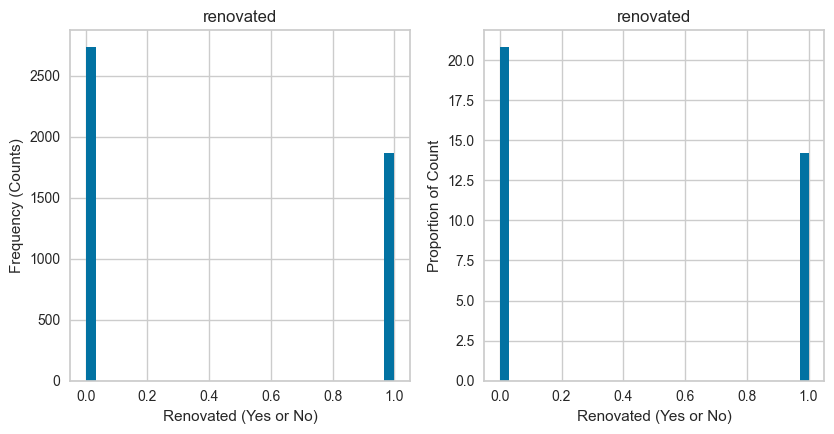

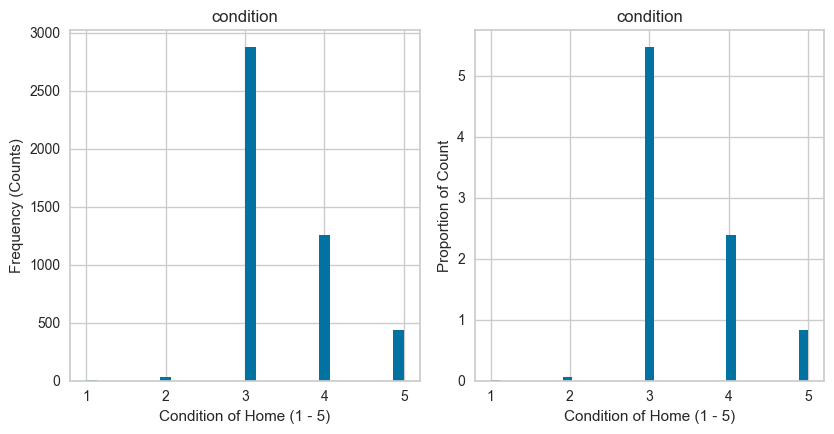

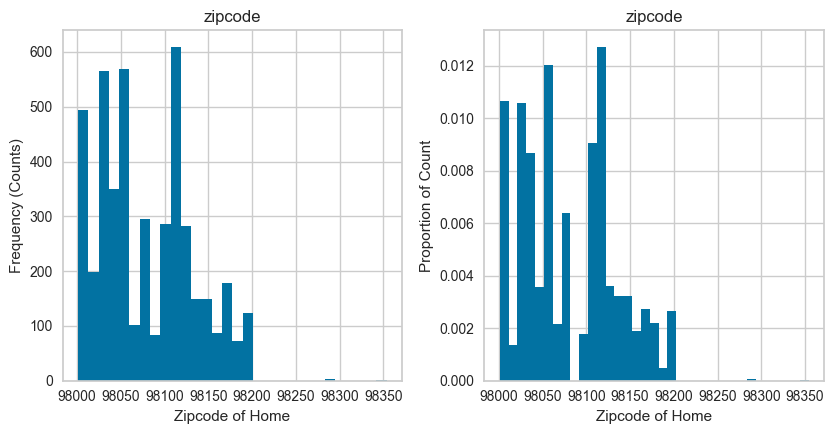

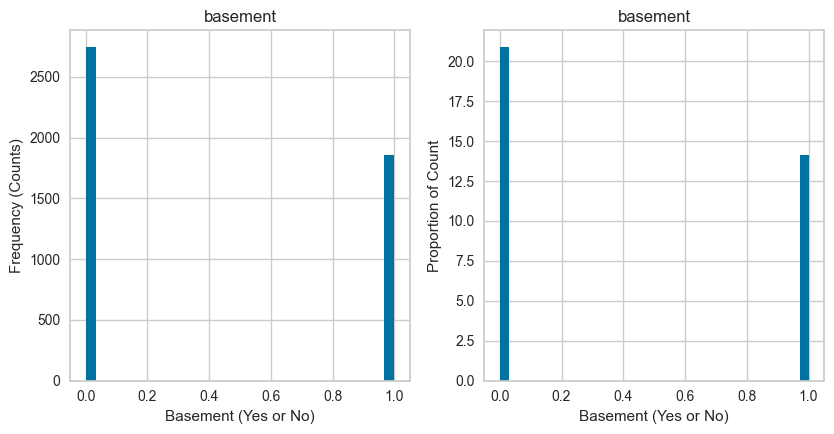

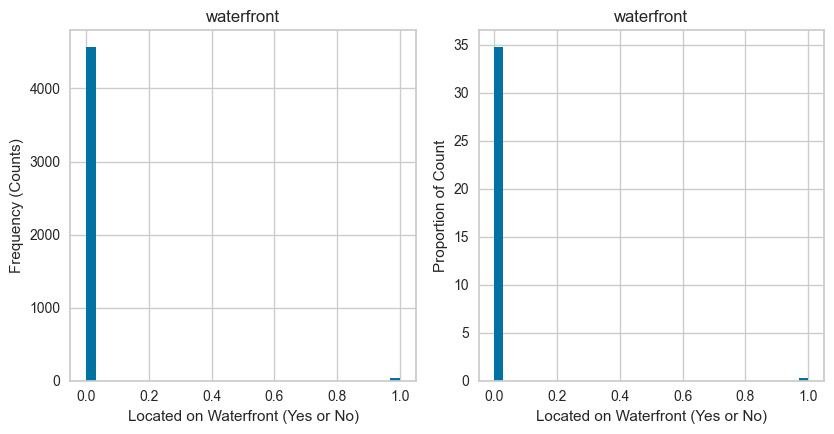

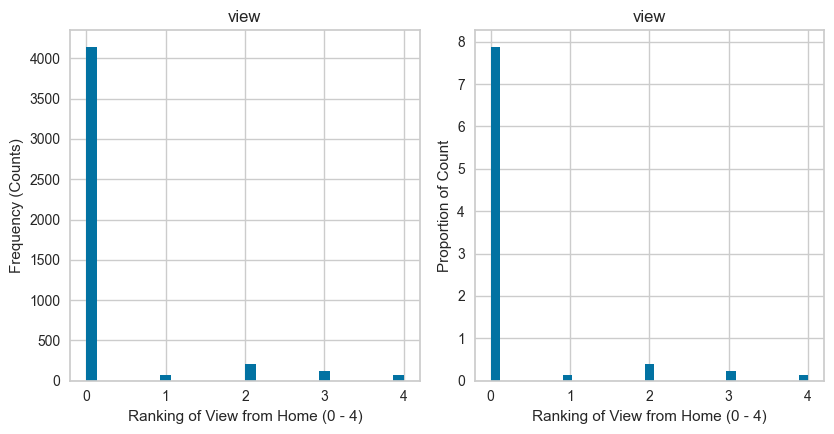

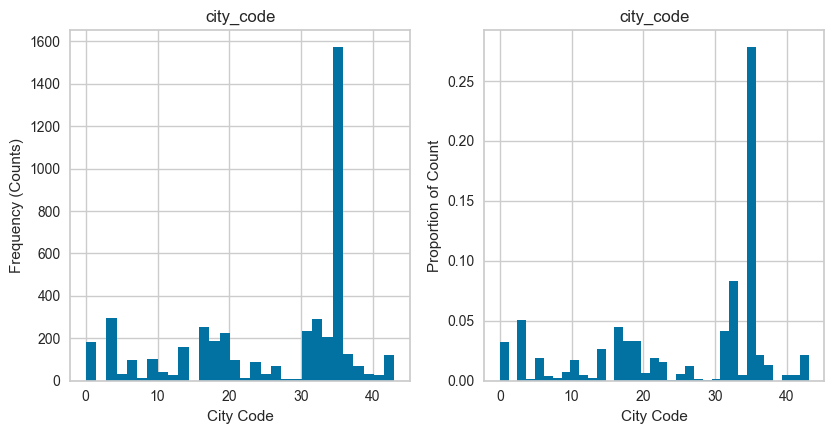



Quantitative Data:



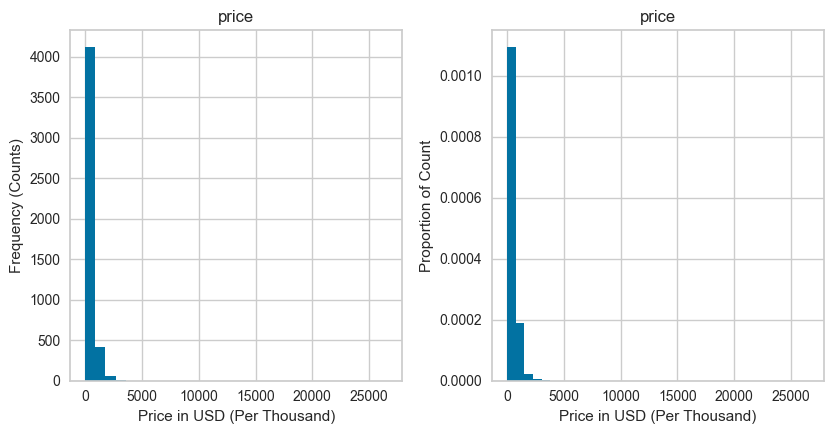

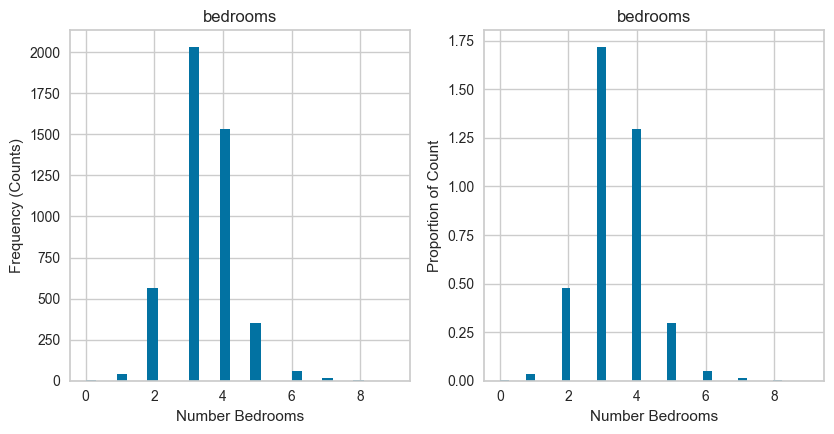

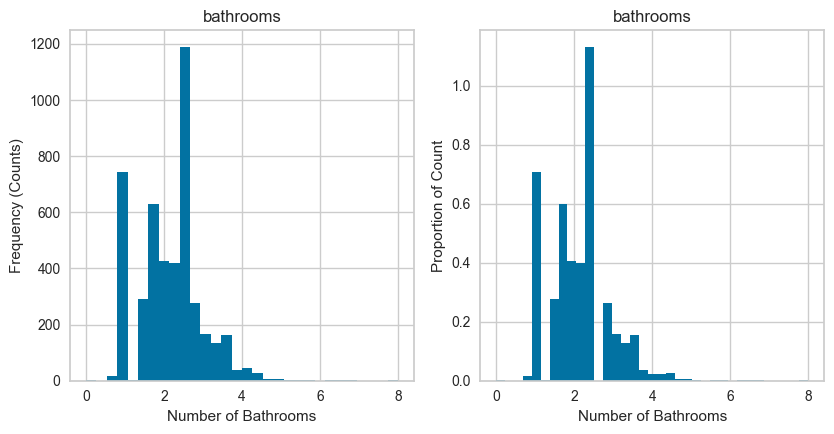

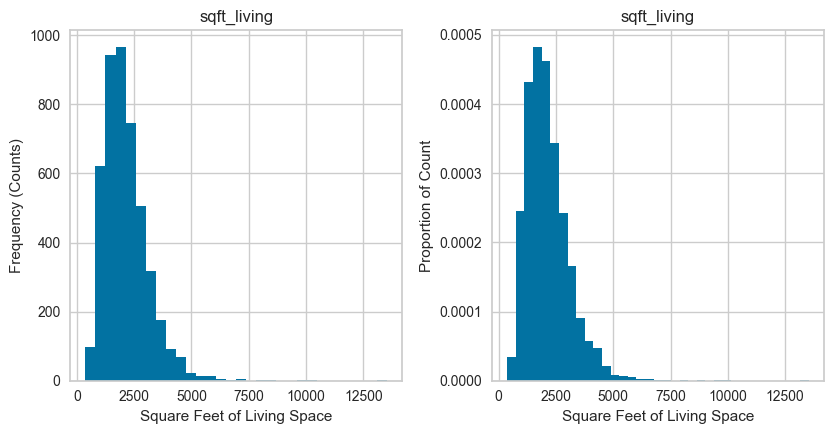

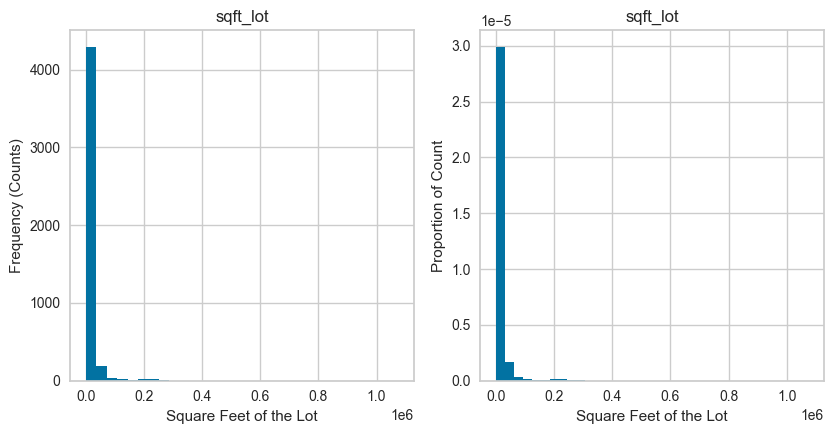

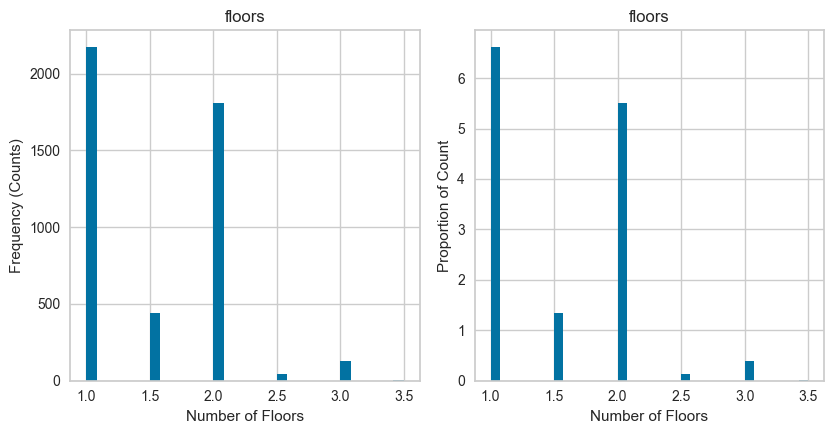

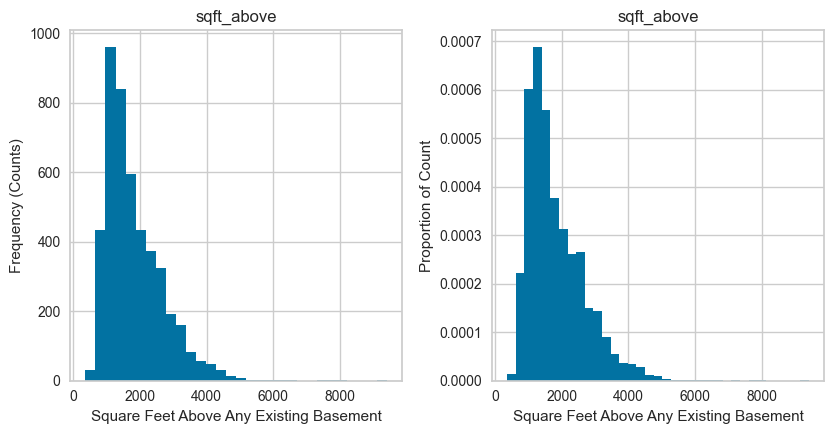

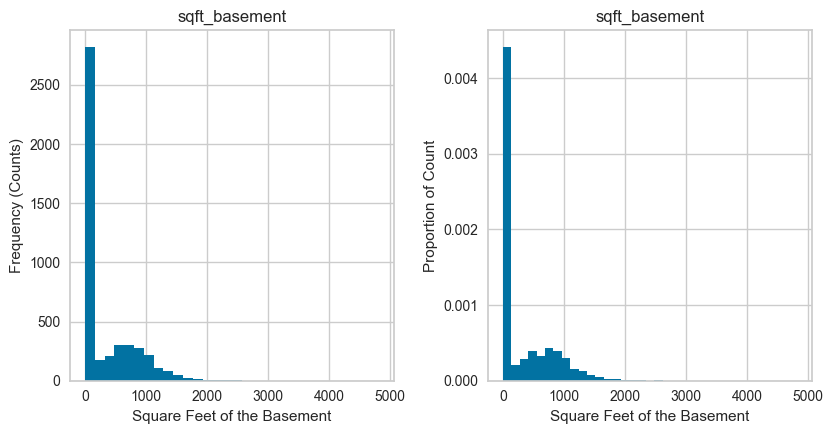

In [211]:
def create_histograms(data, param, x):
  """
  Method to Auto Generate Histograms For a Given Parameter of the Data.
  Creates Both the Frequency and Proportion Histograms
  """
  plt.rcParams["figure.figsize"] = [8.5, 4.5] # Rescale Size of Histograms
  plt.rcParams["figure.autolayout"] = True

  fig, axes = plt.subplots(1, 2) # Allows for Two Side By Side Histograms

  # Create the Frequency Counts Histogram for a Given Parameter
  data.hist(param, ax=axes[0], bins=30)
  axes[0].set_xlabel(x)
  axes[0].set_ylabel('Frequency (Counts)')

  # Create the Proportion Count Histogram for the Given Parameter
  data.hist(param, ax=axes[1], density=True, bins=35)
  axes[1].set_xlabel(x)
  axes[1].set_ylabel('Proportion of Count')
  plt.show()

# Iterate Over the Various Parameters and Populate Their Histograms
print('Categorical Data:\n')
for cat, x in categorical_data.items():
  create_histograms(data, cat, x)

print('\n\nQuantitative Data:\n')
for quant, x in quantitative_data.items():
  create_histograms(data, quant, x)
  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Categorical:



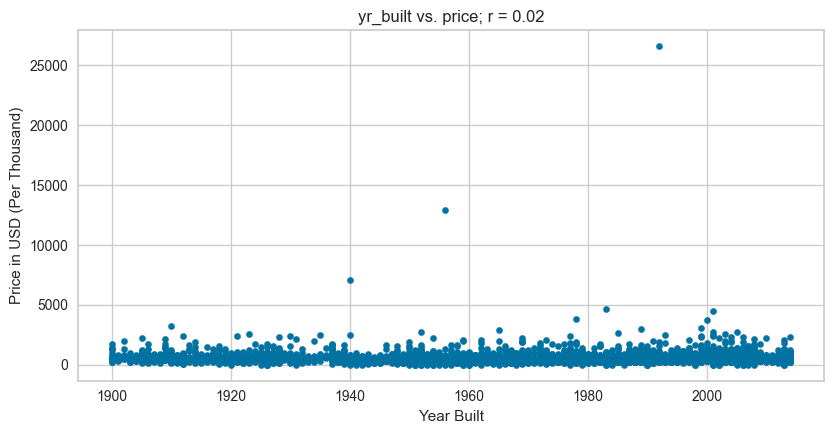

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between yr_built and Price: 0.02
There is Negligible Correlation



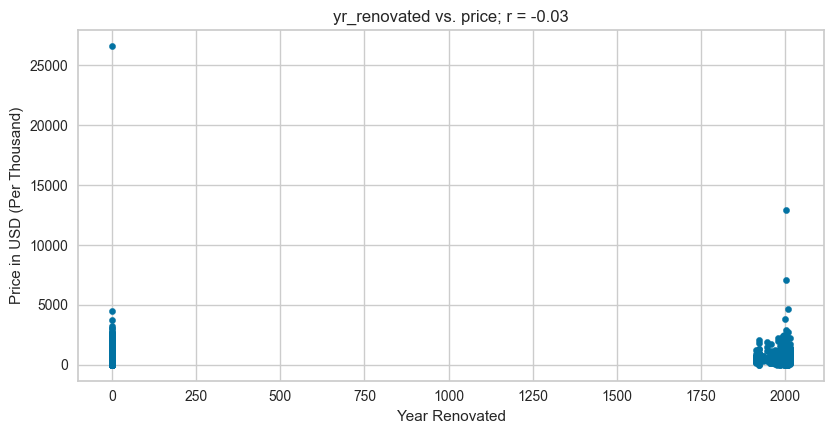

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between yr_renovated and Price: -0.03
There is Negligible Correlation



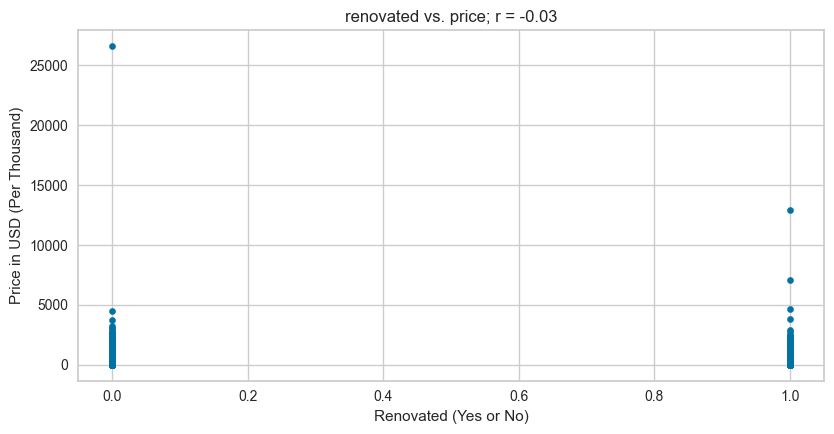

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between renovated and Price: -0.03
There is Negligible Correlation



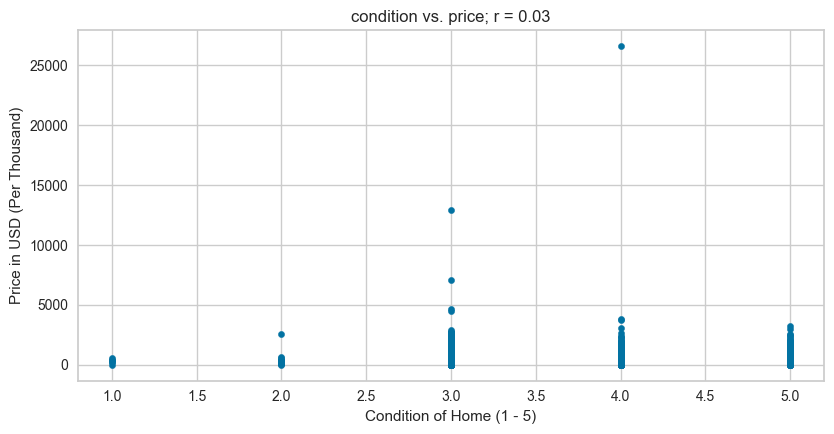

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between condition and Price: 0.03
There is Negligible Correlation



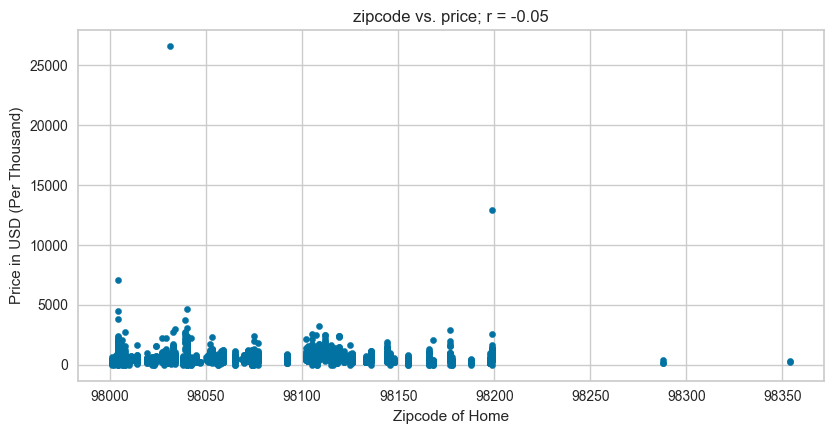

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between zipcode and Price: -0.05
There is Negligible Correlation



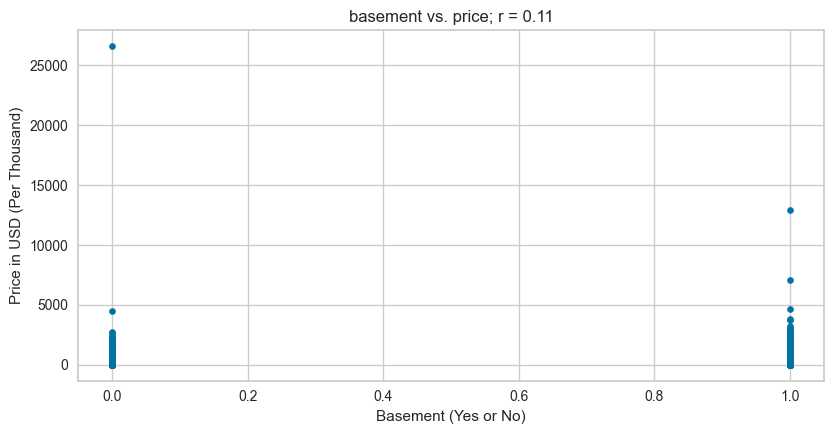

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between basement and Price: 0.11
There is Negligible Correlation



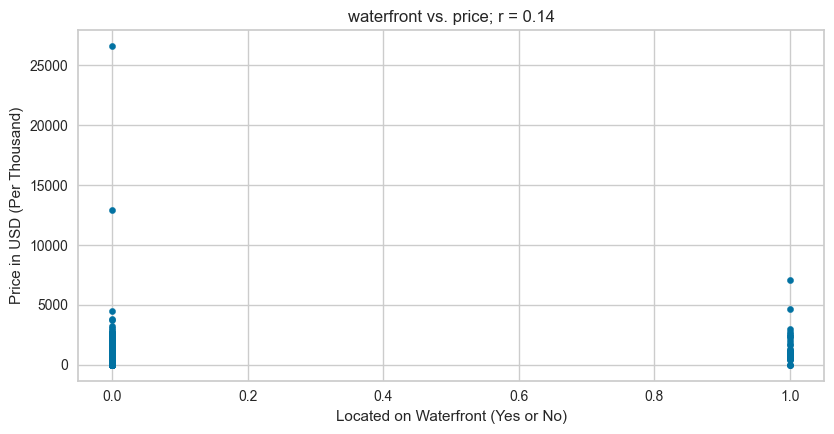

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between waterfront and Price: 0.14
There is Negligible Correlation



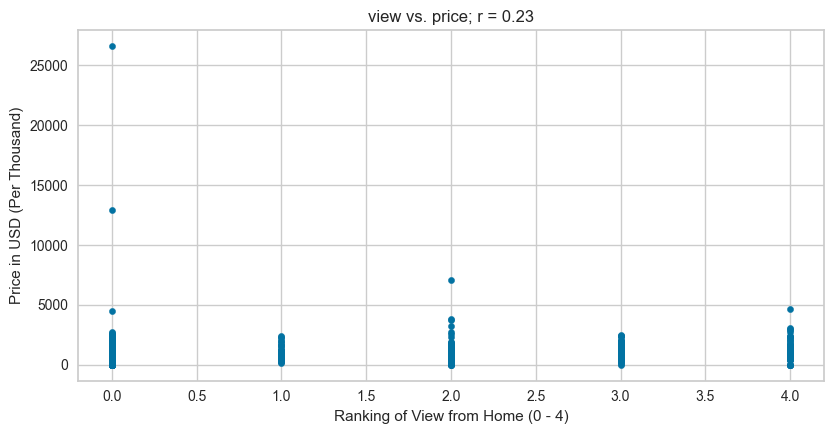

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between view and Price: 0.23
There is Negligible Correlation



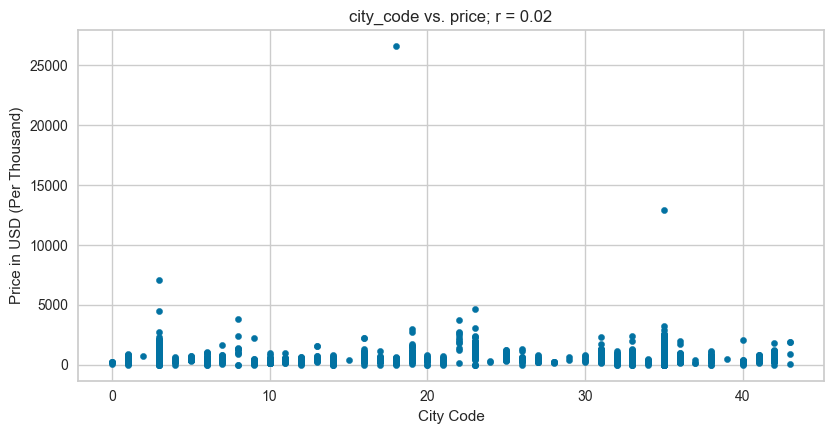

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between city_code and Price: 0.02
There is Negligible Correlation



Quantitative:



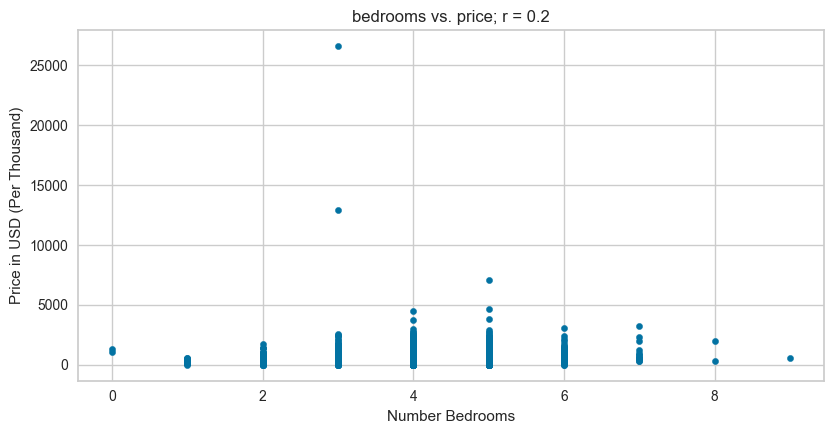

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between bedrooms and Price: 0.2
There is Negligible Correlation



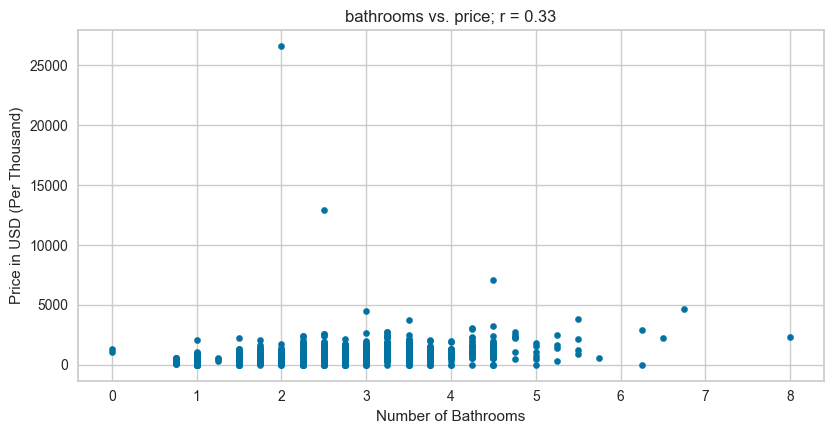

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between bathrooms and Price: 0.33
There is Low Correlation



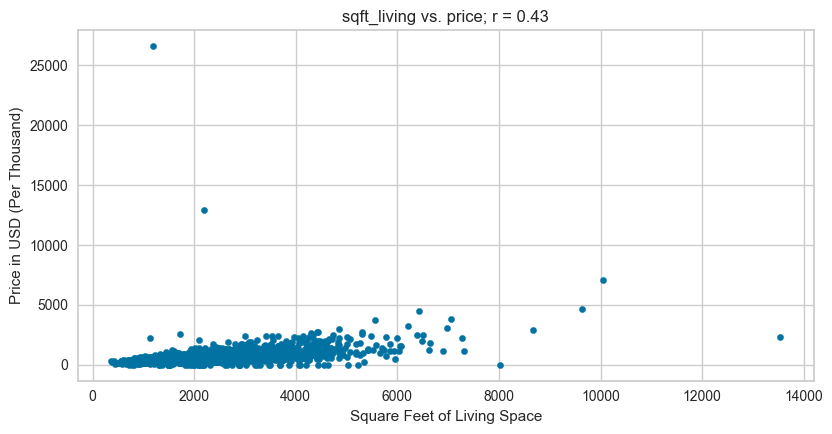

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between sqft_living and Price: 0.43
There is Low Correlation



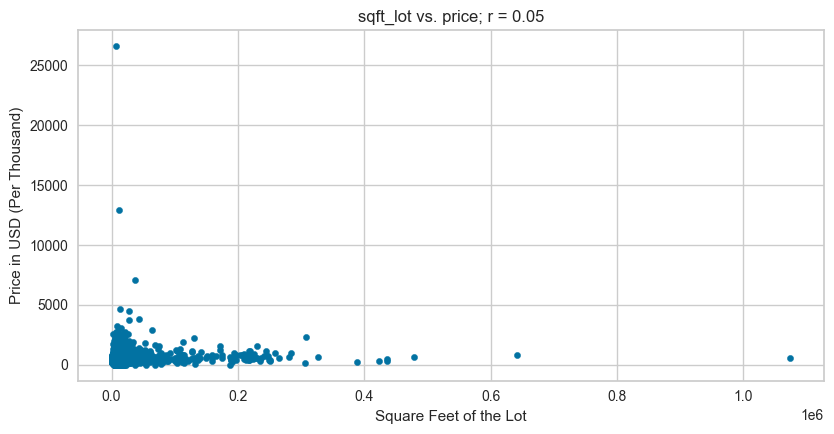

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between sqft_lot and Price: 0.05
There is Negligible Correlation



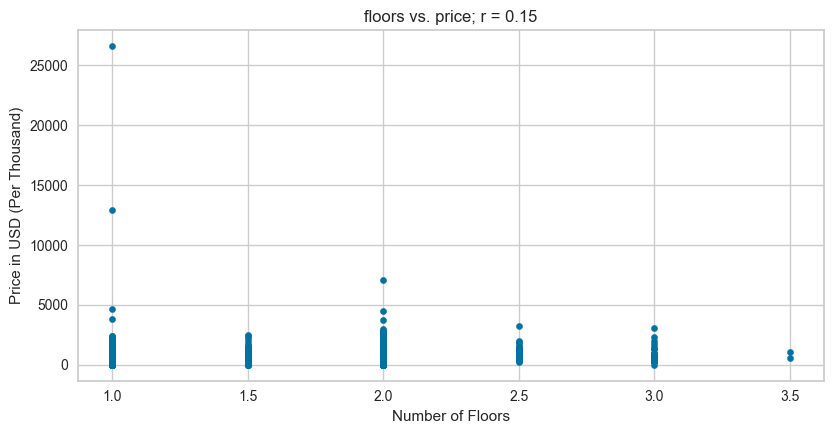

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between floors and Price: 0.15
There is Negligible Correlation



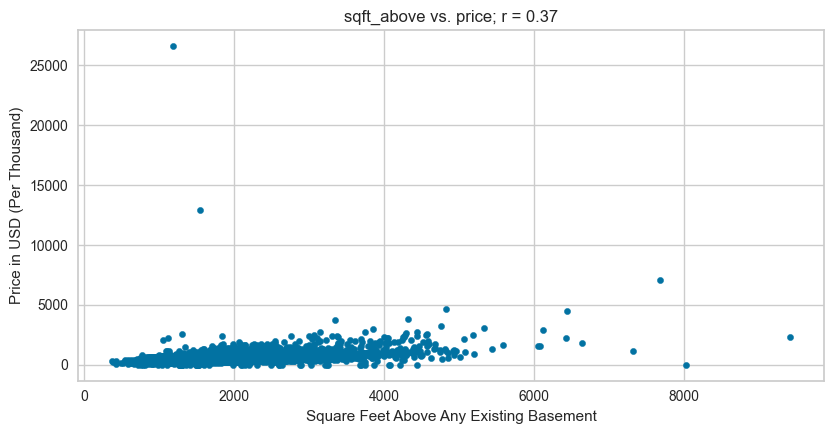

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Calculated Correlation between sqft_above and Price: 0.37
There is Low Correlation



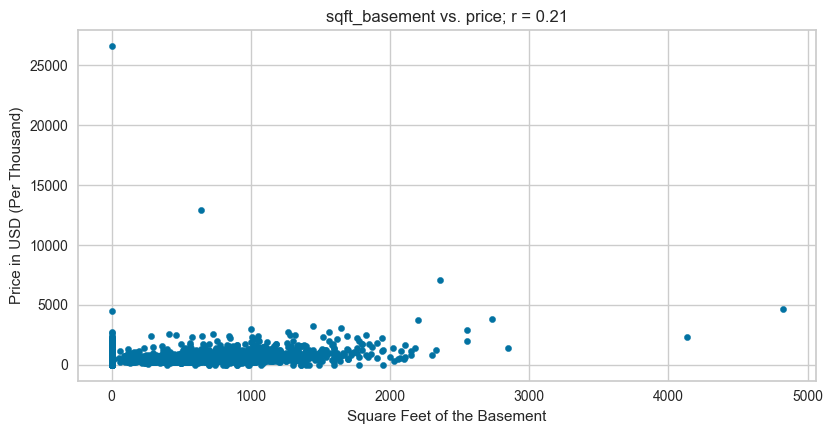

Calculated Correlation between sqft_basement and Price: 0.21
There is Negligible Correlation



In [212]:
## Create Scatter Plots and Dump Correlations Between Parameters and Price
def create_scatter(data, x, x_label, best_fit=False):
  """
  Method to Auto Generate ScatterPlots and the Correlations Between X and 'Price'
  """
  # Plot Price Against Parameter
  data_plot = data.plot.scatter(x, 'price')
  data_plot.set_xlabel(x_label)
  data_plot.set_ylabel('Price in USD (Per Thousand)')

  ## Creation of Best Fit Line If Requested
  if best_fit:
    m, b = np.polyfit(data[x], data['price'], 1)
    plt.plot(data[x], m*data[x]+b, color='red');

  # Calculate Correlation to Be Displayed in the Title
  corr = np.corrcoef(data[x], data['price'])[0,1]
  data_plot.set_title(f'{x} vs. price; r = {round(corr,2)}');
  plt.show()
  print(f'Calculated Correlation between {x} and Price: {round(corr, 2)}')

  # Interpret the Level of Correlation Between the Given Parameter and Price
  abs_corr = abs(corr)
  level = None
  if 0 <= abs_corr < .30:
    print('There is Negligible Correlation\n')
    level = 0
  elif .30 <= abs_corr < .50:
    print('There is Low Correlation\n')
    level = 1
  elif 0.50 <= abs_corr < .70:
    print('There is Moderate Correlation\n')
    level = 2
  elif 0.70 <= abs_corr < .90:
    print('There is High Correlation\n')
    level = 3
  else:
    print('There is Very High Correlation\n')
    level = 4

  return round(corr, 2), level

cat_corr = list()
quant_corr = list()

# Iterate Over the Parameters and Create Their ScatterPlots
print('Categorical:\n')
for cat, x in categorical_data.items():
  cat_corr.append(create_scatter(data, cat, x))

quantitative_data.pop('price', None) # Remove Price as It is the Dependent Variable
print('\n\nQuantitative:\n')
for quant, x in quantitative_data.items():
  quant_corr.append(create_scatter(data, quant, x))

Quantitative:

The Mean of bedrooms is: 3.4
The Standard Deviation of bedrooms is: 0.91
Outliers Exist at Greater than 3 Standard Deviations of the Mean: (0.67, 6.13)


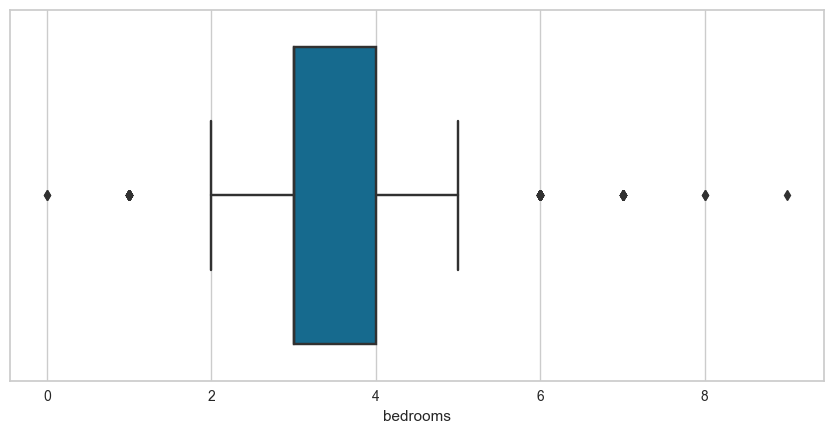

bedrooms Outliers: [7, 9, 7, 7, 7, 7, 7, 7, 8, 7, 0, 7, 7, 7, 7, 0, 7, 8, 7]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
bedrooms and price have a positive correlation of: 0.32
There is Low Correlation
The Correlation w/ Outliers: 0.2, The Correlation w/o Outliers: 0.32
The New Correlation is Larger than the Old Correlation Level, Thus the Outlier(s) have an Influential Effect on the Correlation

The Mean of bathrooms is: 2.16
The Standard Deviation of bathrooms is: 0.78
Outliers Exist at Greater than 3 Standard Deviations of the Mean: (-0.19, 4.51)


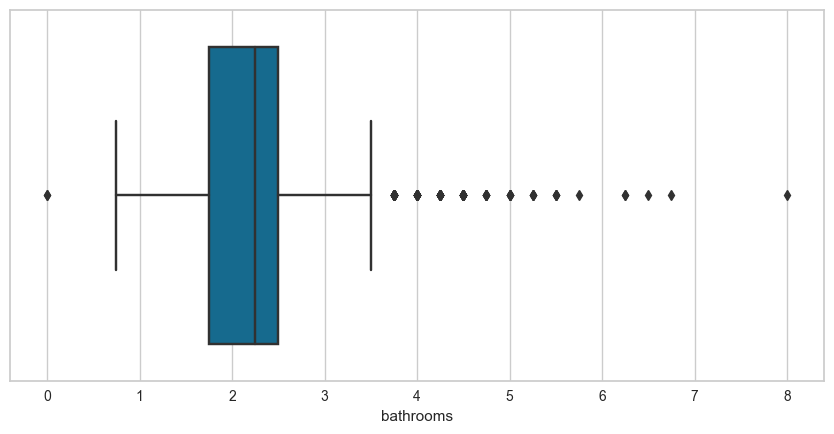

bathrooms Outliers: [8.0, 5.0, 5.75, 6.5, 4.75, 5.0, 5.25, 4.75, 5.5, 4.75, 5.25, 5.0, 6.25, 6.75, 5.0, 4.75, 5.5, 4.75, 5.5, 5.5, 4.75, 5.0, 5.25, 5.25, 4.75, 5.0, 6.25]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
bathrooms and price have a positive correlation of: 0.48
There is Low Correlation
The Correlation w/ Outliers: 0.33, The Correlation w/o Outliers: 0.48
The Was No Change in the Level of the Correlations

The Mean of sqft_living is: 2139.35
The Standard Deviation of sqft_living is: 963.21
Outliers Exist at Greater than 3 Standard Deviations of the Mean: (-750.27, 5028.97)


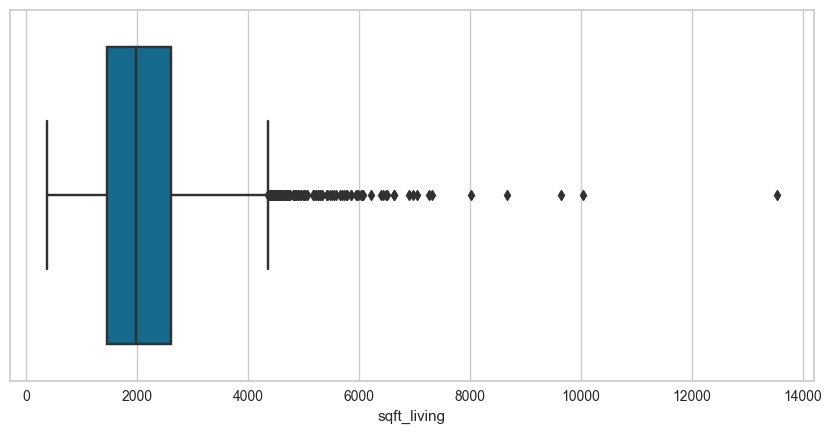

sqft_living Outliers: [13540, 6210, 5860, 5190, 7270, 5420, 5300, 5774, 6490, 5520, 5330, 5305, 6040, 5060, 5584, 5940, 6980, 5700, 5550, 5180, 5660, 5270, 10040, 8670, 5730, 9640, 6050, 6430, 5990, 6900, 5480, 6630, 6390, 5850, 6640, 7050, 5190, 5070, 5430, 5270, 6500, 7320, 5780, 5430, 6070, 5030, 5340, 5960, 5230, 8020]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
sqft_living and price have a positive correlation of: 0.63
There is Moderate Correlation
The Correlation w/ Outliers: 0.43, The Correlation w/o Outliers: 0.63
The New Correlation is Larger than the Old Correlation Level, Thus the Outlier(s) have an Influential Effect on the Correlation

The Mean of sqft_lot is: 14852.52
The Standard Deviation of sqft_lot is: 35884.44
Outliers Exist at Greater than 3 Standard Deviations of the Mean: (-92800.79, 1225

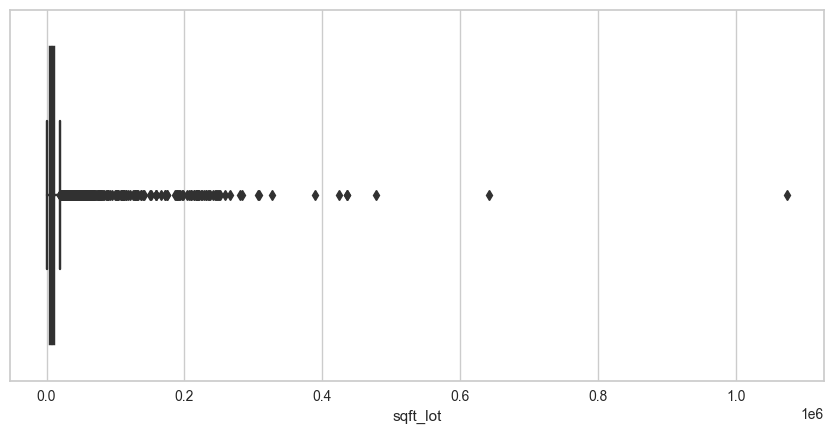

sqft_lot Outliers: [125452, 141570, 307752, 327135, 149410, 226076, 435600, 159430, 130017, 216777, 228254, 258746, 217800, 250470, 151588, 197326, 189486, 435600, 158558, 251341, 1074218, 247421, 219542, 213879, 196817, 217697, 172497, 217800, 235063, 234352, 209523, 423838, 186846, 132858, 137565, 219978, 193593, 131790, 158558, 246114, 224334, 230868, 641203, 175421, 139392, 230652, 219527, 237402, 209088, 244716, 189486, 389126, 206474, 280962, 203425, 284011, 127631, 174240, 265716, 136915, 478288, 249126, 213444, 165528, 128502, 221284, 217014, 241322, 126759, 217800, 217800, 209523, 192099, 171626, 306848, 191228, 188200, 131551]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
sqft_lot and price have a positive correlation of: 0.12
There is Negligible Correlation
The Correlation w/ Outliers: 0.05, The Corre

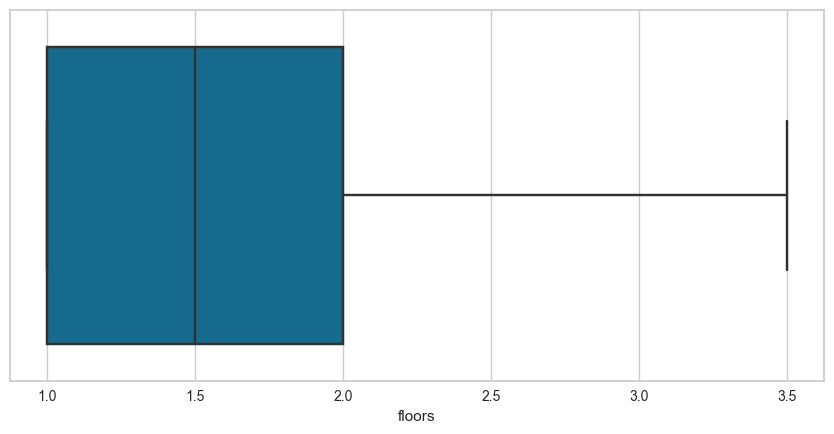

floors Outliers: [3.5, 3.5]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
floors and price have a positive correlation of: 0.27
There is Negligible Correlation
The Correlation w/ Outliers: 0.15, The Correlation w/o Outliers: 0.27
The Was No Change in the Level of the Correlations

The Mean of sqft_above is: 1827.27
The Standard Deviation of sqft_above is: 862.17
Outliers Exist at Greater than 3 Standard Deviations of the Mean: (-759.24, 4413.77)


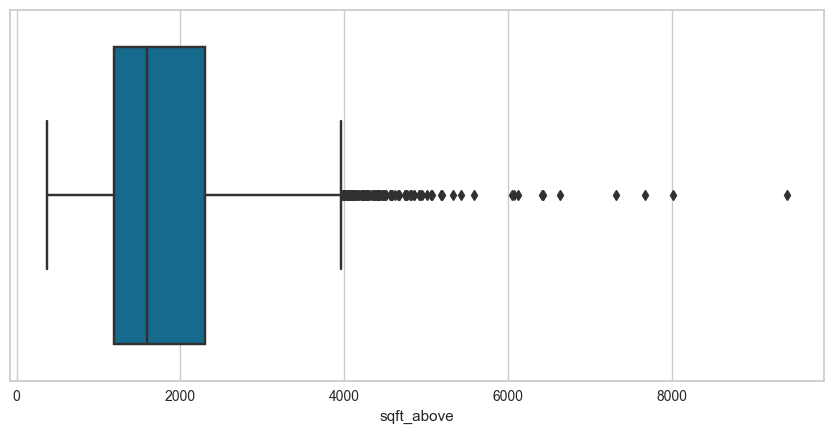

sqft_above Outliers: [9410, 4510, 4460, 4760, 4910, 6420, 4570, 4490, 4470, 4850, 4460, 5060, 4740, 4580, 5584, 4850, 4590, 4950, 5330, 4430, 4670, 7680, 4500, 6120, 4820, 4420, 6050, 6430, 4820, 4430, 4930, 4570, 4470, 4560, 4810, 4620, 4670, 4660, 6640, 5190, 4570, 4930, 5070, 5430, 4740, 5180, 7320, 4440, 6070, 4430, 5010, 4770, 8020]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
sqft_above and price have a positive correlation of: 0.53
There is Moderate Correlation
The Correlation w/ Outliers: 0.37, The Correlation w/o Outliers: 0.53
The New Correlation is Larger than the Old Correlation Level, Thus the Outlier(s) have an Influential Effect on the Correlation

The Mean of sqft_basement is: 312.08
The Standard Deviation of sqft_basement is: 464.14
Outliers Exist at Greater than 3 Standard Deviations of the Me

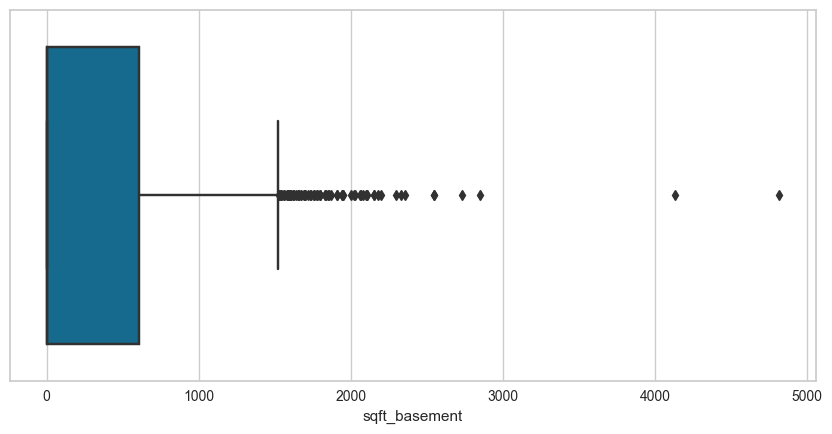

sqft_basement Outliers: [4130, 1760, 1800, 1800, 1740, 2550, 1950, 2330, 1910, 1760, 1940, 2100, 2070, 2180, 2060, 2850, 2200, 2000, 1860, 1910, 2110, 2300, 2150, 1780, 2110, 2360, 2550, 1760, 1800, 4820, 1850, 1940, 1780, 2080, 1830, 1720, 2020, 2150, 2730, 1840, 1830, 1730, 1870, 1780, 2030, 1950]
price Outliers: [2384, 2280, 3200, 2400, 2555, 2700, 2453, 3100, 2750, 2400, 3710, 2400, 2700, 7062, 2888, 2250, 4668, 2475, 4489, 3000, 2400, 2466, 2300, 3800, 2300, 2367, 2271, 2351, 2458, 2680, 2321, 12899, 26590, 2560]
sqft_basement and price have a positive correlation of: 0.24
There is Negligible Correlation
The Correlation w/ Outliers: 0.21, The Correlation w/o Outliers: 0.24
The Was No Change in the Level of the Correlations



In [213]:
# Removal of Outlier to Determine Their Effects on Correlation for Their Parameters

def remove_outliers_report_corr(data, param, old_corr):
  """
  Method to Remove Outliers More than 3 Standard Deviations Away from the Mean.
  The Updated Correlation Will Be Analyzed and Compared to the Original Correlation to Determine the Outlier(s) Effect
  """
  x_mean, x_std = data[param].mean(), data[param].std()
  print(f'The Mean of {param} is: {round(x_mean, 2)}\n\
The Standard Deviation of {param} is: {round(x_std,2)}\n\
Outliers Exist at Greater than 3 Standard Deviations of the Mean: {round(x_mean - 3*x_std, 2), round(x_mean+3*x_std, 2)}')
  

  y_mean, y_std = data['price'].mean(), data['price'].std()
  sns.boxplot(x=data[param])
  plt.show()

  # Remove Any Outliers for the Given Parameter that are More than 3 Standard Deviations from the Mean
  outliers = [x for x in data[param] if x < round(x_mean - 3*x_std, 2) or x > round(x_mean+3*x_std, 2)]
  print(f'{param} Outliers: {outliers}')
  outliers_idx1 = np.where(data[param] < round(x_mean - 3*x_std, 2))
  outliers_idx2 = np.where(data[param] > round(x_mean + 3*x_std, 2))
  outliers_idx_x = np.unique(np.concatenate((outliers_idx1, outliers_idx2), axis=1))

  # Remove Any Outliers for Price that are More than 3 Standard Deviations from the Mean
  outliers = [y for y in data['price'] if y < round(y_mean - 3*y_std, 2) or y > round(y_mean+3*y_std, 2)]
  print(f'price Outliers: {outliers}')
  outliers_idx1 = np.where(data['price'] < round(y_mean - 3*y_std, 2))
  outliers_idx2 = np.where(data['price'] > round(y_mean + 3*y_std, 2))
  outliers_idx_y = np.unique(np.concatenate((outliers_idx1, outliers_idx2), axis=1)) # Concatenate the Indexes of the Price Parameter
  outliers_idx = set(list(outliers_idx_x) + list(outliers_idx_y)) # Concatenate the Given Parameter and Price Indexes and Keep Only the Unique Values
  
  # Drop Outliers Before Computing New Correlation
  data_no_outliers = data.drop(index=outliers_idx)

  # Calculate New Correlations
  y = 'price'
  x = param
  corr = np.corrcoef(data_no_outliers[x], data_no_outliers[y])[0,1]

  # Interpret the New Correlation
  if round(corr, 2) < 0:
    print(f'{x} and {y} have a negative correlation of: {round(corr, 2)}')
  elif round(corr, 2) > 0:
    print(f'{x} and {y} have a positive correlation of: {round(corr, 2)}')
  else:
    print(f'{x} and {y} have a neutral correlation.')

  abs_corr = abs(corr)
  level = None
  if 0 <= abs_corr < .30:
    print('There is Negligible Correlation')
    level = 0
  elif .30 <= abs_corr < .50:
    print('There is Low Correlation')
    level = 1
  elif 0.50 <= abs_corr < .70:
    print('There is Moderate Correlation')
    level = 2
  elif 0.70 <= abs_corr < .90:
    print('There is High Correlation')
    level = 3
  else:
    print('There is Very High Correlation')
    level = 4

  # Compare the New Correlation w/o Outliers to the Previous Correlation w/ Outliers
  print(f'The Correlation w/ Outliers: {old_corr[0]}, The Correlation w/o Outliers: {round(corr, 2)}')
  if old_corr[1] == level:
    print('The Was No Change in the Level of the Correlations\n')
  elif old_corr[1] < level:
    print('The New Correlation is Larger than the Old Correlation Level, Thus the Outlier(s) have an Influential Effect on the Correlation\n')
  else:
    print(f'The New Correlation is Smaller than the Old Correlation Level, Thus the Outlier(s) have an Influential Effect on the Correlation\n')

# Outliers Only Apply to Quantitative Data
print('Quantitative:\n')
idx = 0
for quant, x in quantitative_data.items():
  remove_outliers_report_corr(data, quant, quant_corr[idx])
  idx += 1

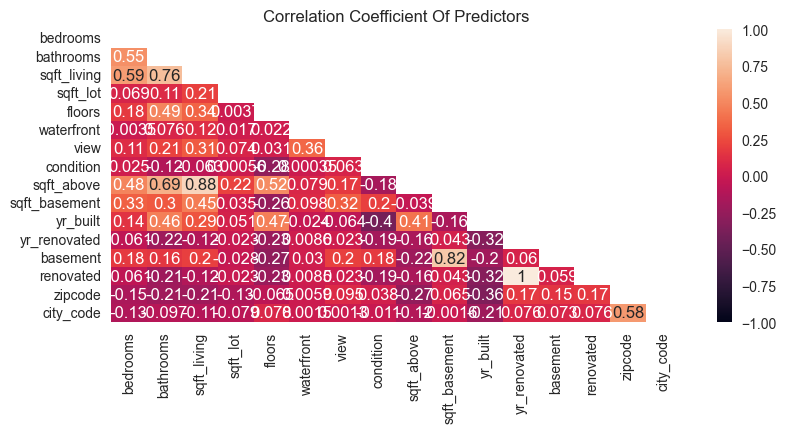

Correlations Above 0.80 Will Be Considered Suspicious of Causing Multicollinearity
Strong Relationships Exist Between:
Sqft of Living and Sqft Above
Sqft of Basement and Basement
Year Renovated and Renovated


In [214]:
## Multicollinearity Analysis ##
# Create Correlation Heatmap of Predictors (Excluding Target 'price')

# Generate a Mask to Only Show the Bottom of the Triange of the Heat Map
mask = np.triu(np.ones_like(data[data.columns[2:]].corr(), dtype=bool))

# Generate Heatmap for Correlations
sns.heatmap(data[data.columns[2:]].corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

print('Correlations Above 0.80 Will Be Considered Suspicious of Causing Multicollinearity')
print('Strong Relationships Exist Between:\n\
Sqft of Living and Sqft Above\n\
Sqft of Basement and Basement\n\
Year Renovated and Renovated')

In [215]:
## Start Model Selection and Analysis ##

In [216]:
import lazypredict
import uszipcode
from uszipcode import SearchEngine
se = SearchEngine()
zips = data['zipcode']
income = []
occupied = []
value = []
units = []
population = []
for i in range(len(zips)):
    x = i
    i += 1
    zip = (zips[x])
    try:
        stats = se.by_zipcode(zip)
        incomes = stats.median_household_income
        income.append(incomes)
        occ_units = stats.occupied_housing_units
        occupied.append(occ_units)
        vals = stats.median_home_value
        value.append(vals)
        units_no = stats.housing_units
        units.append(units_no)
        pop = stats.population_density
        population.append(pop)
    except AttributeError:
        print('Location Not Found')
        income.append('Not Found')
        occupied.append('Not Found')
        value.append('Not Found')
        units.append('Not Found')
        population.append('Not Found')
        continue
data['income'] = income
data['occupied'] = occupied
data['available'] = units
data['vacancy_rt'] = (data['available'] - data['occupied']) / data['available']
data['avg_val'] = value
data['pop_dens'] = population
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,basement,renovated,zipcode,city_code,income,occupied,available,vacancy_rt,avg_val,pop_dens
0,2014-05-02,313,3,1.50,1340,7912,1.5,0,0,3,...,0,1,98133,36,51499,20180,21903,0.078665,326400,6279.0
1,2014-05-02,2384,5,2.50,3650,9050,2.0,0,4,5,...,1,0,98119,35,68383,10682,11592,0.078502,608300,8638.0
2,2014-05-02,342,3,2.00,1930,11947,1.0,0,0,4,...,0,0,98042,18,87342,15097,15820,0.045702,297100,1537.0
3,2014-05-02,420,3,2.25,2000,8030,1.0,0,0,4,...,1,0,98008,3,92986,9173,9552,0.039678,457200,4437.0
4,2014-05-02,550,4,2.50,1940,10500,1.0,0,0,4,...,1,1,98052,31,99192,24008,25674,0.064891,465200,2908.0


In [217]:
## Establish Independent / Dependent Variables
x1 = data.drop(['date','sqft_above', 'sqft_basement',
'yr_built', 'yr_renovated', 'street', 'city', 'statezip',
'country', 'zipcode', 'city_code', 'occupied', 'available'], axis = 1)
y1 = data['price']
x1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,basement,renovated,income,vacancy_rt,avg_val,pop_dens
0,313,3,1.50,1340,7912,1.5,0,0,3,0,1,51499,0.078665,326400,6279.0
1,2384,5,2.50,3650,9050,2.0,0,4,5,1,0,68383,0.078502,608300,8638.0
2,342,3,2.00,1930,11947,1.0,0,0,4,0,0,87342,0.045702,297100,1537.0
3,420,3,2.25,2000,8030,1.0,0,0,4,1,0,92986,0.039678,457200,4437.0
4,550,4,2.50,1940,10500,1.0,0,0,4,1,1,99192,0.064891,465200,2908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308,3,1.75,1510,6360,1.0,0,0,4,0,1,51499,0.078665,326400,6279.0
4596,534,3,2.50,1460,7573,2.0,0,0,3,0,1,73162,0.061932,379000,5684.0
4597,416,3,2.50,3010,7014,2.0,0,0,3,0,0,91465,0.046140,363500,1725.0
4598,203,4,2.00,2090,6630,1.0,0,0,3,1,0,58707,0.066954,283100,4966.0


In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dep = x1['price']
scalers = x1.iloc[: , 1:15]
scaled_x = scaler.fit_transform(scalers)
df = pd.DataFrame(scaled_x, columns = scalers.columns)
df['price'] = dep
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,basement,renovated,income,vacancy_rt,avg_val,pop_dens,price
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.0,1.0,0.110857,0.058036,0.191259,0.396601,313
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,1.0,0.0,0.186485,0.057818,0.529715,0.545650,2384
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.0,0.0,0.271408,0.013881,0.156081,0.096986,342
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,1.0,0.0,0.296688,0.005812,0.348301,0.280217,420
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,1.0,1.0,0.324487,0.039585,0.357906,0.183610,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.0,1.0,0.110857,0.058036,0.191259,0.396601,308
4596,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.0,1.0,0.207892,0.035621,0.254412,0.359007,534
4597,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.0,0.0,0.289876,0.014468,0.235802,0.108865,416
4598,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,1.0,0.0,0.143144,0.042348,0.139272,0.313641,203


In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x1, y1,
test_size=0.25, random_state=0)
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)
scaled_input = pd.DataFrame(scaled_x_train)
deps = list(y_train)
scaled_input['price'] = deps
len(scaled_x_test)


1150

In [220]:
import pycaret
from sklearn.metrics import r2_score
from pycaret.regression import *

In [221]:
## Results Utilizing A General Regression
s = setup(data=df, target='price')
best = compare_models()
model = best
result = predict_model(best)
result

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,114.3885,46530.5519,215.7094,0.6434,0.7819,0.1983


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,basement,renovated,income,vacancy_rt,avg_val,pop_dens,price,prediction_label
3220,0.666667,0.31250,0.306758,0.012478,0.0,0.0,0.50,0.75,1.0,0.0,0.085751,0.038835,0.065434,0.239970,472,757.456670
3221,0.444444,0.43750,0.221716,0.004449,0.4,0.0,0.25,0.50,1.0,0.0,0.228165,0.026756,0.237483,0.279649,899,676.550777
3222,0.333333,0.12500,0.045558,0.006617,0.0,0.0,0.00,0.75,0.0,0.0,0.085751,0.038835,0.065434,0.239970,219,125.024969
3223,0.222222,0.12500,0.044799,0.003989,0.0,0.0,0.00,0.50,0.0,1.0,0.269813,0.004121,0.355865,0.502369,280,409.929831
3224,0.444444,0.28125,0.119970,0.004948,0.0,0.0,0.00,0.50,1.0,1.0,0.225235,0.095900,0.341337,0.654514,895,595.645033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.333333,0.40625,0.173880,0.003132,0.4,0.0,0.00,0.50,1.0,0.0,0.120134,0.062653,0.288750,0.858786,915,746.603094
4596,0.444444,0.37500,0.227790,0.006783,0.0,0.0,0.75,0.50,1.0,1.0,0.269813,0.004121,0.355865,0.502369,1325,930.115881
4597,0.444444,0.31250,0.187547,0.005244,0.4,0.0,0.00,0.50,0.0,1.0,0.249486,0.044143,0.263056,0.227712,580,594.380085
4598,0.444444,0.21875,0.070615,0.018966,0.0,0.0,0.00,0.75,0.0,0.0,0.201549,0.016013,0.122103,0.108359,229,180.551623


Model: Linear Regression

r2 Score: 0.6434062358402662


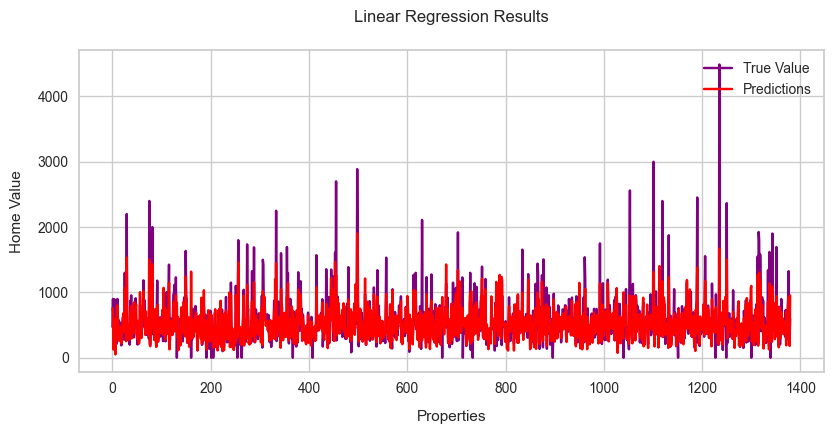

In [222]:
print('Model: Linear Regression\n')
print('r2 Score:', r2_score(result['price'], result['prediction_label']))
plt.plot(list(range(0, len(result['price']))), result['price'], label='True Value', c='purple')
plt.plot(list(range(0, len(result['price']))), result['prediction_label'], label='Predictions', c='red')
plt.legend(loc='upper right')
plt.title('Linear Regression Results', pad =20)
plt.xlabel('Properties', labelpad=10)
plt.ylabel('Home Value', labelpad=10)
plt.show()

In [223]:
from pycaret.regression import *
s = setup(data=scaled_input, target='price',
          fold=5, train_size=0.7)
models = ['dt', 'rf', 'huber']
model_tuned = []
scores = []
predictions = []
prediction_list = pd.DataFrame()
for i in models:
    dt = create_model(i)
    tuned_dt = tune_model(dt, n_iter=5,
    optimize='MAE', choose_better=True)
    model_tuned.append(tuned_dt)
    test_set = get_config('X_test')
    test_y = get_config('y_test')
    #model = tuned_dt.fit(x_train, y_train)
    y_pred = tuned_dt.predict(test_set)
    prediction_list[i] = y_pred
    predictions.append(y_pred)
    score = r2_score(y_pred, test_y)
    print('r2 Score of Model', score, ':', )
    scores.append(score)
eval = pd.DataFrame({'Model': models,
                    'r2': scores})
eval['prediction'] = predictions
eval['models'] = model_tuned    


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.1745,15424.4504,124.1952,0.9899,0.5387,0.0990
1,27.6677,8317.8203,91.2021,0.9613,0.4656,0.0577
2,34.2167,29389.7315,171.4343,0.9303,0.4443,0.0695
3,26.4050,5748.2455,75.8172,0.9497,0.3759,0.0509
4,25.3843,8638.7514,92.9449,0.9263,0.2728,0.0554
Mean,30.9696,13503.7998,111.1187,0.9515,0.4195,0.0665
Std,5.9602,8564.6182,34.0063,0.0231,0.0899,0.0174


In [224]:
eval

,Model,r2,prediction,models
0,dt,0.966474,"[568.0, 863.0, 622.0, 336.0, 2280.0, 455.0, 44...",DecisionTreeRegressor(random_state=867)
1,rf,0.987366,"[568.12, 865.51, 620.0, 335.98, 2284.82, 454.9...","(DecisionTreeRegressor(max_features=1.0, rando..."
2,huber,0.955988,"[552.1899414918078, 891.8355262246827, 638.611...",HuberRegressor(alpha=1e-07)


In [225]:
for i in eval['models']:
    save_model(i, 'my_pipeline')

In [226]:
pipeline = load_model('my_pipeline')
print(pipeline)

In [227]:
eval

,Model,r2,prediction,models
0,dt,0.966474,"[568.0, 863.0, 622.0, 336.0, 2280.0, 455.0, 44...",DecisionTreeRegressor(random_state=867)
1,rf,0.987366,"[568.12, 865.51, 620.0, 335.98, 2284.82, 454.9...","(DecisionTreeRegressor(max_features=1.0, rando..."
2,huber,0.955988,"[552.1899414918078, 891.8355262246827, 638.611...",HuberRegressor(alpha=1e-07)


In [228]:
prediction_list

,dt,rf,huber
0,568.0,568.12,552.189941
1,863.0,865.51,891.835526
2,622.0,620.00,638.611040
3,336.0,335.98,368.535077
4,2280.0,2284.82,2350.732564
...,...,...,...
1030,830.0,831.10,854.987894
1031,464.0,463.93,474.975863
1032,240.0,239.91,218.877675
1033,234.0,234.15,233.792278


Model: dt
Model r2 Score:
 0.9664735418998321


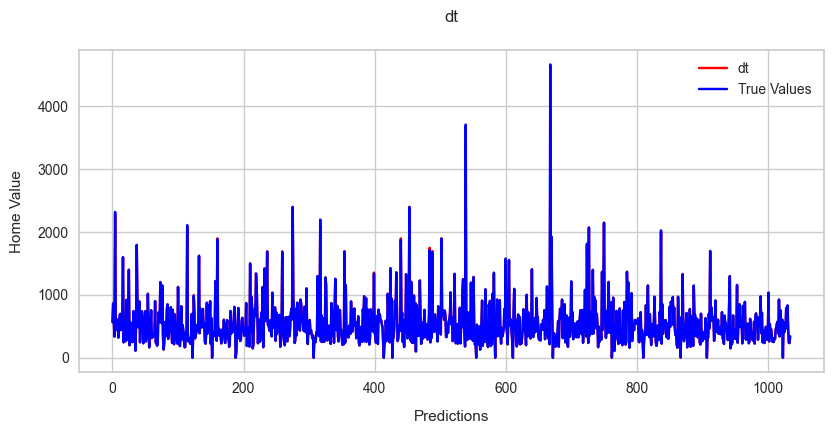

None
Model: rf
Model r2 Score:
 0.9873657887971619


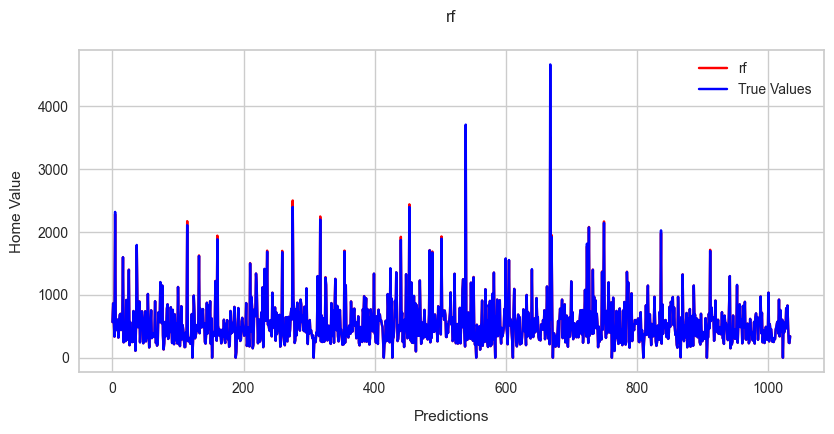

None
Model: huber
Model r2 Score:
 0.9559877830161556


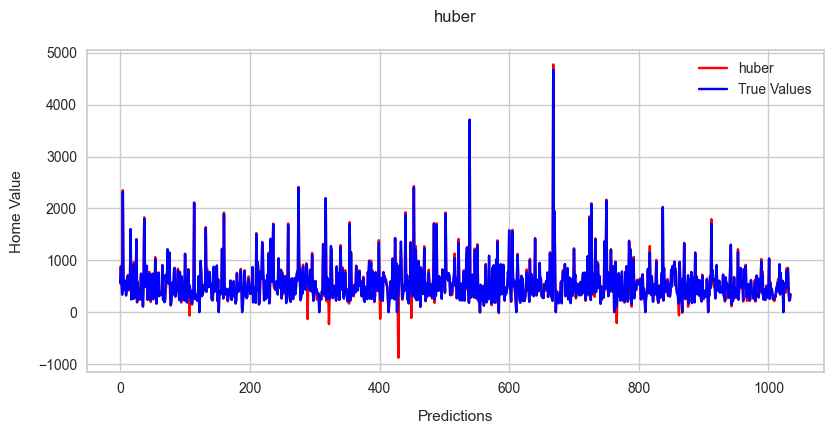

None


In [229]:
for i in eval['Model']:
    plt.plot(list(range(0,len(y_pred))), prediction_list[i], c='red', label=i)
    plt.plot(list(range(0,len(y_pred))), test_y, c='blue', label='True Values')
    plt.xlabel('Predictions', labelpad=10)
    plt.ylabel('Home Value', labelpad=10)
    plt.legend(loc='upper right')
    plt.title(i, pad=20)
    print('Model:',i)
    print('Model r2 Score:\n',r2_score(prediction_list[i], test_y))
    print(plt.show())

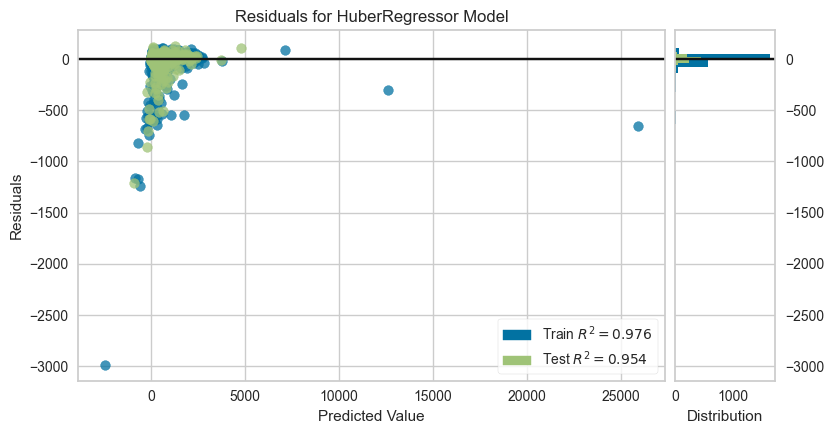

In [237]:
plot_model(tuned_dt, plot='residuals')